Name: Yesha Patel(000790164), Urvashiben Thakkar(000789927)

LTU Honor Code: "I pledge that on all academic work that I submit, I will neither give nor receive unauthorized aid, nor will I present another person's work as my own."

In [51]:
from google.colab import drive
drive.mount('/content/drive') #google drive mounted

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [52]:
import os, shutil

IDs = ['A042', 'A069', 'A449', 'A980', 'B461', 'C708', 'F044', 'H298', 'J282',

       'K603', 'K629', 'N066', 'R903', 'S941', 'U927', 'V988', 'Y164']
# Directories for MC1

b_dir = '/content/drive/My Drive/FPD/FPD_MC1_ALL'  #my directory path

train_dir = b_dir+'/train/'

vali_dir = b_dir+'/validation/'

test_dir = b_dir+'/test/'

test1_dir = b_dir+'/test1/'
def print_tot_num_images():

  for fn in IDs:

    trn = len(os.listdir (train_dir+fn))

    val = len(os.listdir (vali_dir+fn))

    tst = len(os.listdir (test_dir+fn))

    print(f"    ID: {fn} (train, vali, test) = ({trn}, {val}, {tst})")

print_tot_num_images()

    ID: A042 (train, vali, test) = (160, 20, 20)
    ID: A069 (train, vali, test) = (160, 20, 20)
    ID: A449 (train, vali, test) = (160, 20, 20)
    ID: A980 (train, vali, test) = (160, 20, 20)
    ID: B461 (train, vali, test) = (160, 20, 20)
    ID: C708 (train, vali, test) = (160, 20, 20)
    ID: F044 (train, vali, test) = (160, 20, 20)
    ID: H298 (train, vali, test) = (160, 20, 20)
    ID: J282 (train, vali, test) = (160, 20, 20)
    ID: K603 (train, vali, test) = (160, 20, 20)
    ID: K629 (train, vali, test) = (160, 20, 20)
    ID: N066 (train, vali, test) = (160, 20, 20)
    ID: R903 (train, vali, test) = (160, 20, 20)
    ID: S941 (train, vali, test) = (160, 20, 20)
    ID: U927 (train, vali, test) = (160, 20, 20)
    ID: V988 (train, vali, test) = (120, 20, 20)
    ID: Y164 (train, vali, test) = (160, 20, 20)


In [53]:
from keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    train_dir,
    image_size=(300, 500),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    vali_dir,
    image_size=(300, 500),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    test_dir,
    image_size=(300, 500),
    batch_size=32,
    shuffle=False)

Found 2680 files belonging to 17 classes.
Found 340 files belonging to 17 classes.
Found 340 files belonging to 17 classes.


# **Model 1: CNN for Multi Class Classification 1**

In [54]:
#importing libraries
from tensorflow import keras
from keras import layers
from keras import models
from keras import optimizers
from keras.callbacks import ModelCheckpoint


#data augmentation for model
data_augmentation = keras.Sequential(
    [
        #layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.1),
        layers.RandomContrast(0.1),
        layers.RandomTranslation(0.1, 0.1)
    ]
)

In [55]:
inputs = keras.Input(shape=(300, 500, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(32, kernel_size=(3, 3), activation="relu", padding="same")(inputs)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)
x = layers.Conv2D(32, kernel_size=(3, 3), activation="relu", padding="same")(x)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)
x = layers.Conv2D(64, kernel_size=(3, 3), activation="relu", padding="same")(x)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)
x = layers.Conv2D(64, kernel_size=(3, 3), activation="relu", padding="same")(x)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)
x = layers.Conv2D(64, kernel_size=(3, 3), activation="relu", padding="same")(x)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)
x = layers.Conv2D(128, kernel_size=(3, 3), activation="relu", padding="same")(x)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.3)(x)
outputs = layers.Dense(17, activation="softmax")(x)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

m=model
m.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 300, 500, 3)]     0         
                                                                 
 conv2d_12 (Conv2D)          (None, 300, 500, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 150, 250, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 150, 250, 32)      9248      
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 75, 125, 32)       0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 75, 125, 64)       1849

In [56]:
#printing shape of data
for data_batch, labels_batch in train_dataset:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (32, 300, 500, 3)
labels batch shape: (32,)


In [57]:
from keras.callbacks import EarlyStopping

# Define early stopping callback
callbacks_list = [
    keras.callbacks.EarlyStopping(
        monitor="val_loss",
        patience=2,
        restore_best_weights=True,
        verbose=1),

   #model traing using fit and callbacks used for save best model while traning
    keras.callbacks.ModelCheckpoint(
        filepath="/drive/My Drive/h5/fingers_modelMC1a.h5",
        save_best_only=True,
        monitor="val_loss")
]

history = m.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    #callbacks=callbacks,
    callbacks=callbacks_list)
#!ls '/gdrive/My Drive/DL_data/history_files/'

Epoch 1/30
84/84 [==============================] - 18s 177ms/step - loss: 3.4054 - accuracy: 0.1881 - val_loss: 2.2541 - val_accuracy: 0.2706
Epoch 2/30
84/84 [==============================] - 16s 170ms/step - loss: 1.7450 - accuracy: 0.4463 - val_loss: 1.3044 - val_accuracy: 0.5559
Epoch 3/30
84/84 [==============================] - 15s 167ms/step - loss: 1.1221 - accuracy: 0.6332 - val_loss: 0.9802 - val_accuracy: 0.7176
Epoch 4/30
84/84 [==============================] - 15s 167ms/step - loss: 0.8404 - accuracy: 0.7272 - val_loss: 0.9119 - val_accuracy: 0.7529
Epoch 5/30
84/84 [==============================] - 15s 167ms/step - loss: 0.6544 - accuracy: 0.7821 - val_loss: 1.0395 - val_accuracy: 0.7324
Epoch 6/30
84/84 [==============================] - 15s 169ms/step - loss: 0.5836 - accuracy: 0.8112 - val_loss: 0.6424 - val_accuracy: 0.7971
Epoch 7/30
84/84 [==============================] - 15s 167ms/step - loss: 0.4780 - accuracy: 0.8451 - val_loss: 0.8180 - val_accuracy: 0.7588

In [58]:
m.save('/drive/My Drive/h5/fingers_modelMC1a.h5') # best model save in folder

In [59]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [60]:
final_training_loss = history.history['loss'][-1]
final_validation_loss = history.history['val_loss'][-1]
final_training_accuracy = history.history['accuracy'][-1]
final_validation_accuracy = history.history['val_accuracy'][-1]

print("Final Training Loss:", final_training_loss)
print("Final Validation Loss:", final_validation_loss)
print("Final Training Accuracy:", 100*final_training_accuracy)
print("Final Validation Accuracy:", 100*final_validation_accuracy)


Final Training Loss: 0.13827082514762878
Final Validation Loss: 0.5404223203659058
Final Training Accuracy: 95.74626684188843
Final Validation Accuracy: 88.23529481887817


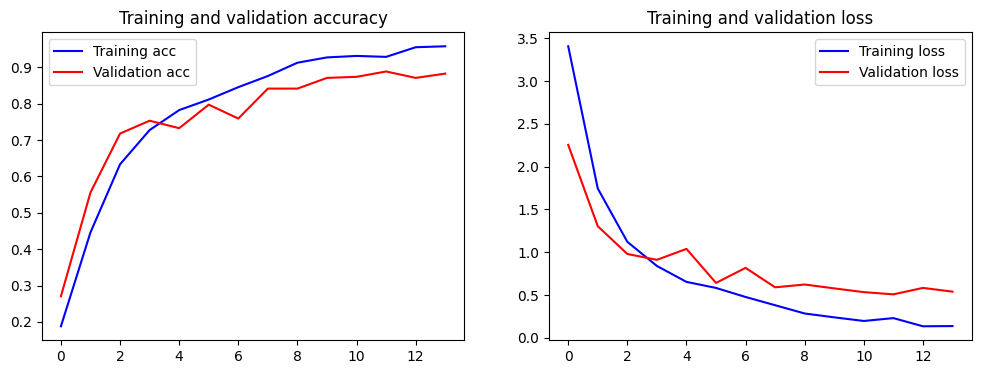

In [61]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(12, 4)

ax1.plot(epochs, acc, 'b', label='Training acc')
ax1.plot(epochs, val_acc, 'r', label='Validation acc')
ax1.set_title('Training and validation accuracy')
ax1.legend()

ax2.plot(epochs, loss, 'b', label='Training loss')
ax2.plot(epochs, val_loss, 'r', label='Validation loss')
ax2.set_title('Training and validation loss')
ax2.legend()

plt.show()

In [62]:
# To get the 1st batch from test dataset
for test_data_batch, test_labels_batch in test_dataset:
    print('test_data batch shape:', test_data_batch.shape)
    print('test_labels batch shape:', test_labels_batch.shape)
    break
#print(test_data_batch[0]) #float32

test_data batch shape: (32, 300, 500, 3)
test_labels batch shape: (32,)


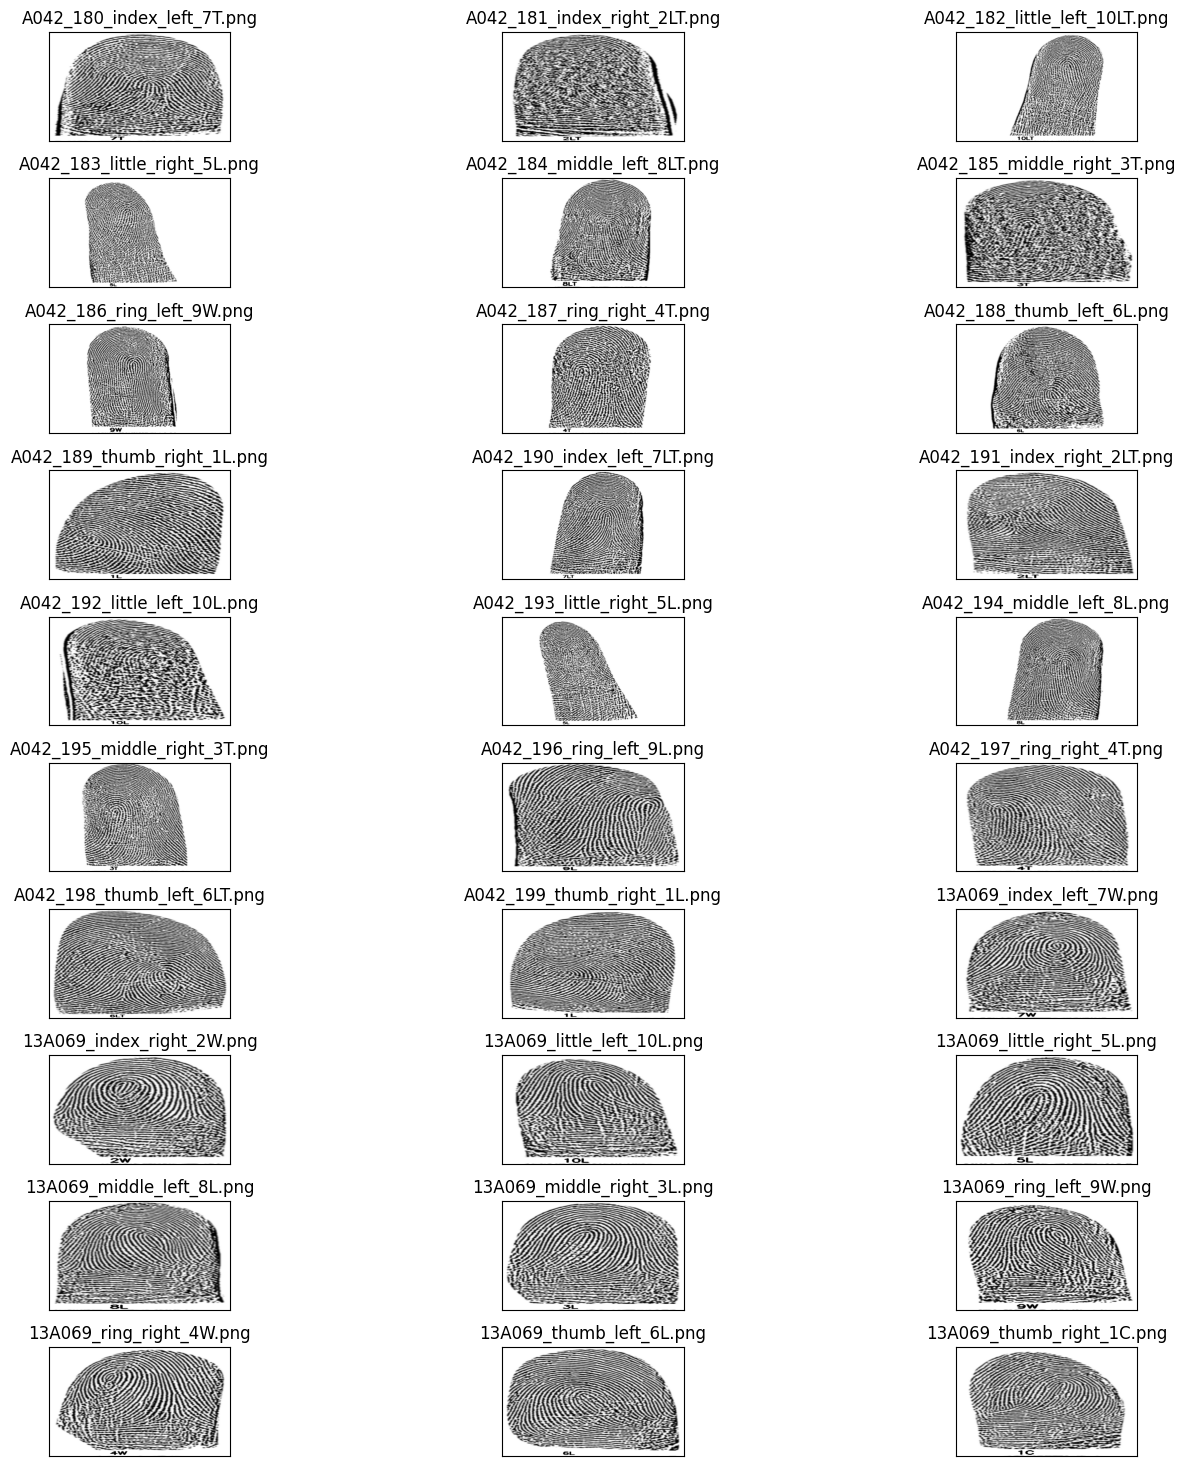

In [63]:
#displaying images from test dataset
plt.figure(figsize=(15,15))
for i in range(30):
    plt.subplot(10,3,i+1)
    plt.tight_layout()
    plt.imshow(test_data_batch[i].numpy().astype("uint8"))

    # Get the image filename
    image_name = test_dataset.file_paths[i].split('/')[-1]  # Assuming '/' as the path separator
    plt.title(image_name)  # Set the image name as the title

    plt.xticks([])
    plt.yticks([])

plt.show()


In [64]:
#model evaluation using test dataset
test_model = keras.models.load_model("/drive/My Drive/h5/fingers_modelMC1a.h5")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy for CNN: {100*test_acc:.3f}")

11/11 [==============================] - 2s 142ms/step - loss: 0.6168 - accuracy: 0.8412
Test accuracy for CNN: 84.118


In [65]:
#model evaluation using test dataset
test_loss1, test_acc1 = m.evaluate(test_dataset)
print(f"Test accuracy for CNN: {100*test_acc1:.3f}")

11/11 [==============================] - 2s 143ms/step - loss: 0.6168 - accuracy: 0.8412
Test accuracy for CNN: 84.118


# **Model 2: Pre-Trained for Multi Class Classification 1 - ResNet50**

In [81]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import layers
#from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix, f1_score



# Load ResNet50 convolutional base
resnet50_base = keras.applications.ResNet50(
    weights='imagenet',
    include_top=False,
    input_shape=(300, 500, 3)
)

# Freeze all layers in the pre-trained model
resnet50_base.trainable = False

# Build model on top of convolutional base
inputs = keras.Input(shape=(300, 500, 3))
x = data_augmentation(inputs)
x = resnet50_base(inputs, training=False)
x = layers.GlobalMaxPooling2D()(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.4)(x)
outputs = layers.Dense(17, activation='softmax')(x)
model_resnet50 = keras.Model(inputs, outputs)


# Compile the model
model_resnet50.compile(optimizer='rmsprop',
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])

# Print model summary
model_resnet50.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 300, 500, 3)]     0         
                                                                 
 resnet50 (Functional)       (None, 10, 16, 2048)      23587712  
                                                                 
 global_max_pooling2d_4 (Gl  (None, 2048)              0         
 obalMaxPooling2D)                                               
                                                                 
 dense_11 (Dense)            (None, 256)               524544    
                                                                 
 dropout_7 (Dropout)         (None, 256)               0         
                                                                 
 dense_12 (Dense)            (None, 17)                4369      
                                                           

In [82]:
from keras.callbacks import EarlyStopping

# Define early stopping callback
callbacks_list = [
    keras.callbacks.EarlyStopping(
        monitor="val_loss",
        patience=2,
        restore_best_weights=True,
        verbose=1),

   #model traing using fit and callbacks used for save best model while traning
    keras.callbacks.ModelCheckpoint(
        filepath="/content/drive/MyDrive/h5/MC1_FT.h5",
        save_best_only=True,
        monitor="val_loss")
]

# Train the ResNet50 model
history_resnet50 = model_resnet50.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    #callbacks=callbacks,
    callbacks=callbacks_list)
#!ls '/gdrive/My Drive/DL_data/history_files/'

Epoch 1/30
84/84 [==============================] - ETA: 0s - loss: 4.9151 - accuracy: 0.1828

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


84/84 [==============================] - 22s 207ms/step - loss: 4.9151 - accuracy: 0.1828 - val_loss: 2.3194 - val_accuracy: 0.2647
Epoch 2/30
84/84 [==============================] - 20s 215ms/step - loss: 2.2852 - accuracy: 0.2649 - val_loss: 1.9873 - val_accuracy: 0.3353
Epoch 3/30
84/84 [==============================] - 19s 206ms/step - loss: 2.1306 - accuracy: 0.2966 - val_loss: 1.9240 - val_accuracy: 0.3441
Epoch 4/30
84/84 [==============================] - 19s 205ms/step - loss: 1.9795 - accuracy: 0.3519 - val_loss: 1.6647 - val_accuracy: 0.4206
Epoch 5/30
84/84 [==============================] - 19s 207ms/step - loss: 1.8353 - accuracy: 0.3847 - val_loss: 1.5080 - val_accuracy: 0.5088
Epoch 6/30
84/84 [==============================] - 19s 208ms/step - loss: 1.6969 - accuracy: 0.4306 - val_loss: 1.3515 - val_accuracy: 0.5912
Epoch 7/30
84/84 [==============================] - 17s 184ms/step - loss: 1.6199 - accuracy: 0.4597 - val_loss: 1.3696 - val_accuracy: 0.5559
Epoch 8/30

In [83]:
# Unfreeze some top layers of the pre-trained model for fine-tuning
resnet50_base.trainable = True
# Fine-tune from this layer onwards
fine_tune_at = 100
for layer in resnet50_base.layers[:fine_tune_at]:
    layer.trainable = False

# Recompile the model for fine-tuning
model_resnet50.compile(optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
                        loss='sparse_categorical_crossentropy',
                        metrics=['accuracy'])


In [84]:
from keras.callbacks import EarlyStopping

# Define early stopping callback
callbacks_list = [
    keras.callbacks.EarlyStopping(
        monitor="val_loss",
        patience=2,
        restore_best_weights=True,
        verbose=1),

   #model traing using fit and callbacks used for save best model while traning
    keras.callbacks.ModelCheckpoint(
        filepath="/content/drive/MyDrive/h5/MC1_FT.h5",
        save_best_only=True,
        monitor="val_loss")
]

# Train the ResNet50 model
history_resnet50 = model_resnet50.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    #callbacks=callbacks,
    callbacks=callbacks_list)
#!ls '/gdrive/My Drive/DL_data/history_files/'

Epoch 1/30
84/84 [==============================] - 32s 237ms/step - loss: 1.4288 - accuracy: 0.5201 - val_loss: 1.1093 - val_accuracy: 0.6794
Epoch 2/30
84/84 [==============================] - 20s 221ms/step - loss: 1.2538 - accuracy: 0.5642 - val_loss: 1.0068 - val_accuracy: 0.7000
Epoch 3/30
84/84 [==============================] - 20s 220ms/step - loss: 1.1220 - accuracy: 0.5940 - val_loss: 0.9355 - val_accuracy: 0.7441
Epoch 4/30
84/84 [==============================] - 21s 231ms/step - loss: 1.0663 - accuracy: 0.6127 - val_loss: 0.8320 - val_accuracy: 0.7735
Epoch 5/30
84/84 [==============================] - 20s 220ms/step - loss: 0.9486 - accuracy: 0.6683 - val_loss: 0.7725 - val_accuracy: 0.7912
Epoch 6/30
84/84 [==============================] - 21s 228ms/step - loss: 0.8621 - accuracy: 0.6817 - val_loss: 0.7719 - val_accuracy: 0.7941
Epoch 7/30
84/84 [==============================] - 21s 231ms/step - loss: 0.8241 - accuracy: 0.6993 - val_loss: 0.7124 - val_accuracy: 0.8382

In [85]:
model_resnet50.save('/content/drive/MyDrive/h5/MC1_FT.h5') # best model save in folder

In [86]:
final_training_loss = history.history['loss'][-1]
final_validation_loss = history.history['val_loss'][-1]
final_training_accuracy = history.history['accuracy'][-1]
final_validation_accuracy = history.history['val_accuracy'][-1]

print("Final Training Loss:", final_training_loss)
print("Final Validation Loss:", final_validation_loss)
print("Final Training Accuracy:", 100*final_training_accuracy)
print("Final Validation Accuracy:", 100*final_validation_accuracy)


Final Training Loss: 0.13827082514762878
Final Validation Loss: 0.5404223203659058
Final Training Accuracy: 95.74626684188843
Final Validation Accuracy: 88.23529481887817


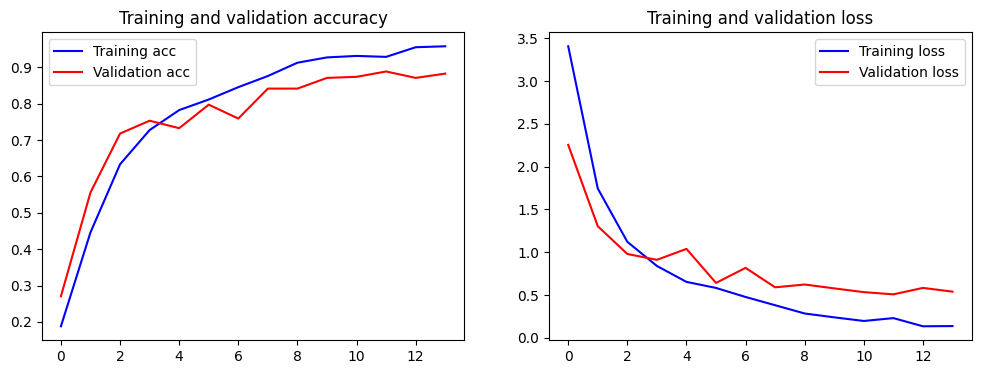

In [87]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(12, 4)

ax1.plot(epochs, acc, 'b', label='Training acc')
ax1.plot(epochs, val_acc, 'r', label='Validation acc')
ax1.set_title('Training and validation accuracy')
ax1.legend()

ax2.plot(epochs, loss, 'b', label='Training loss')
ax2.plot(epochs, val_loss, 'r', label='Validation loss')
ax2.set_title('Training and validation loss')
ax2.legend()

plt.show()

In [88]:
# Evaluate the model on the test dataset
loss, accuracy = model_resnet50.evaluate(test_dataset)

print("Test Loss:", loss)
print("Test Accuracy:", accuracy)



11/11 [==============================] - 2s 184ms/step - loss: 0.4601 - accuracy: 0.8735
Test Loss: 0.46009114384651184
Test Accuracy: 0.8735294342041016


test_data batch shape: (32, 300, 500, 3)
test_labels batch shape: (32,)


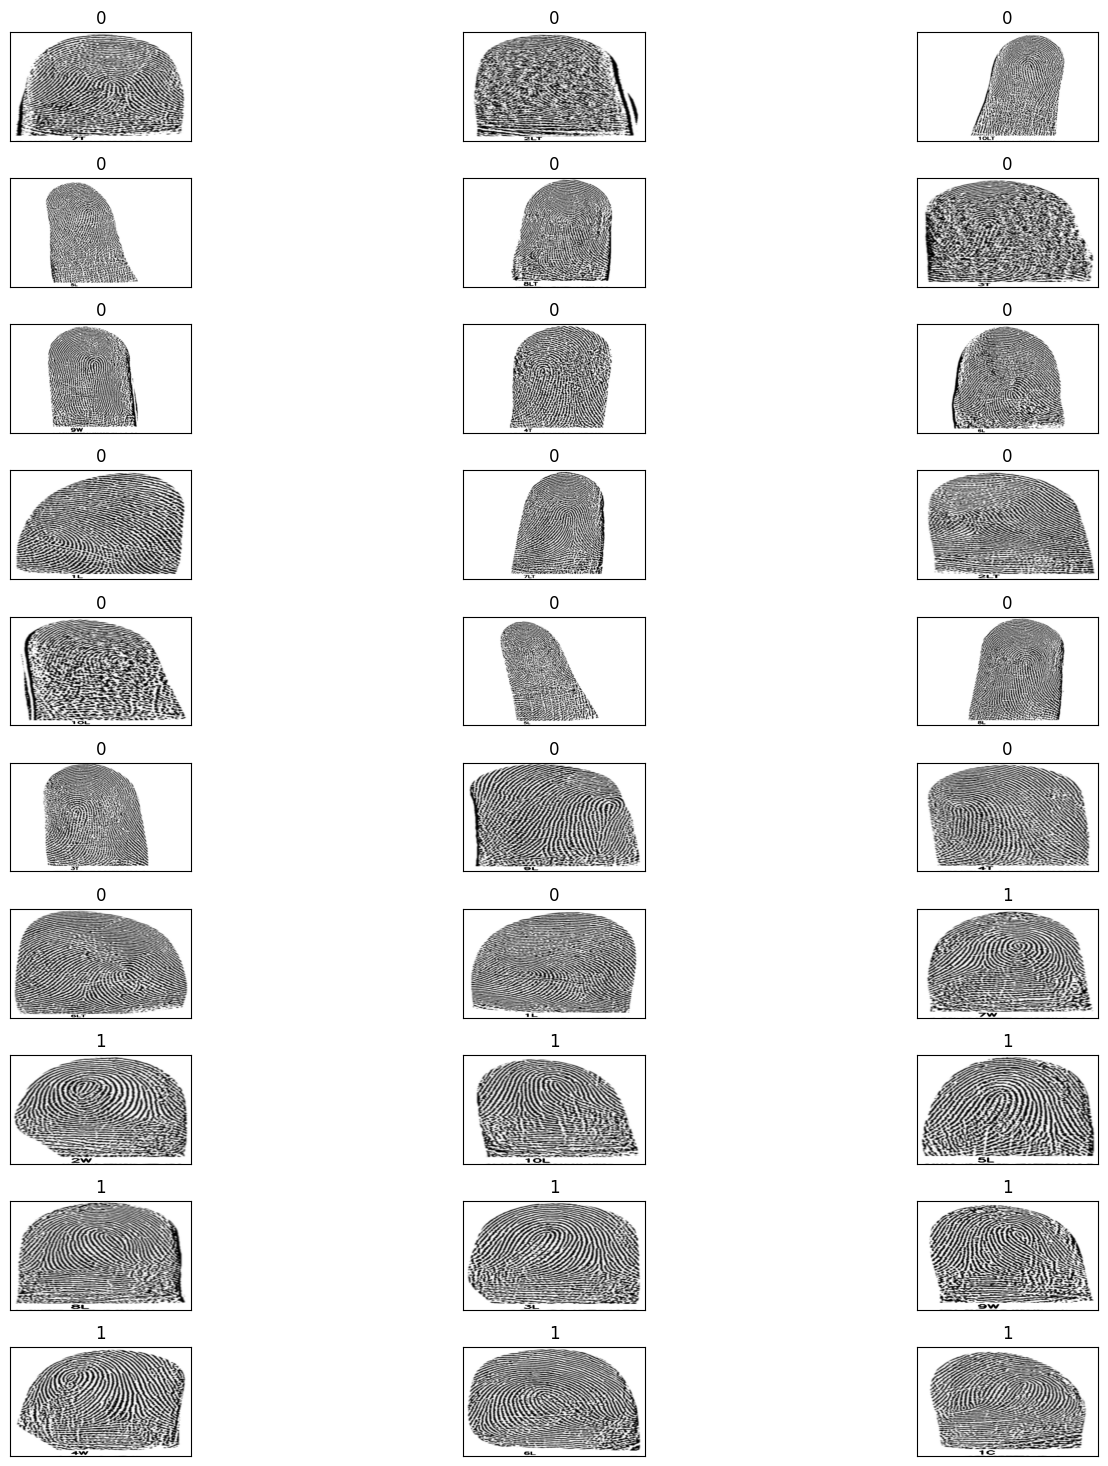

In [89]:
# To get the 1st batch from test dataset
for test_data_batch, test_labels_batch in test_dataset:
    print('test_data batch shape:', test_data_batch.shape)
    print('test_labels batch shape:', test_labels_batch.shape)
    break

import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(15,15))
for i in range(30):
  plt.subplot(10,3,i+1)
  plt.tight_layout()
  plt.imshow(test_data_batch[i].numpy().astype("uint8"))
  plt.title(f"{test_labels_batch[i]}")
  plt.xticks([])
  plt.yticks([])

11/11 [==============================] - 3s 158ms/step
Confusion Matrix:
[[17  0  0  0  0  0  0  2  0  0  0  0  0  0  0  0  1]
 [ 0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 18  0  2  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 19  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [ 0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0 13  1  0  0  1  2  0  2  0]
 [ 0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0  0  0 18  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 20  0  0  0  0  0]
 [ 0  0  0  0  0  2  0  1  0  0  0  0 17  0  0  0  0]
 [ 1  1  0  0  1  5  0  0  0  0  0  0  0  9  0  3  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 20  0  0]
 [ 0  2  1  0  0  2  0  0  0  1  0  0  0  1  0 13  0]
 [ 2  1  0  0  1  1  0  0  1  0  0  0  0  0  0  0 14]]


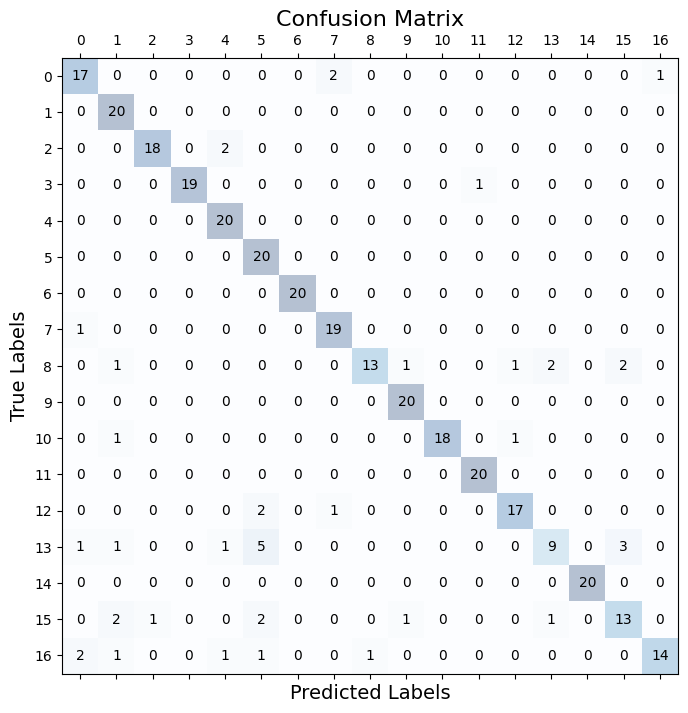

In [90]:
from matplotlib.ticker import MultipleLocator

# Predict labels for the test dataset
predictions = model_resnet50.predict(test_dataset)
predicted_labels = np.argmax(predictions, axis=1)

# Extract true labels from the test dataset
true_labels = []
for images, labels in test_dataset:
    true_labels.extend(labels.numpy())

# Calculate confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)
print("Confusion Matrix:")
print(conf_matrix)

# Plotting the confusion matrix
fig, ax = plt.subplots(figsize=(8, 8))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.set_major_locator(MultipleLocator(1))
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i, s=conf_matrix[i, j], va='center', ha='center', size='medium')
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
plt.show()

In [91]:
# Calculate F1 score
f1 = f1_score(true_labels, predicted_labels, average='weighted')
print("F1 Score:", f1)

F1 Score: 0.8687466253739817


# **Avarage Esemble models**


In [92]:
# Load models
model1 = keras.models.load_model('/drive/My Drive/h5/fingers_modelMC1a.h5')
model2 = keras.models.load_model('/content/drive/MyDrive/h5/MC1_FT.h5')

test_loss1, test_acc1 = model1.evaluate(test_dataset)
test_loss2, test_acc2 = model2.evaluate(test_dataset)

ensemble_accuracy = (test_acc1 + test_acc2) / 2
print(f"Ensemble accuracy: {ensemble_accuracy:.2f}%")

# Make predictions
pred1 = model1.predict(test_dataset)
pred2 = model2.predict(test_dataset)

# Convert predictions to probabilities
prob1 = pred1.squeeze()  # Assuming pred1 has shape (batch_size, 1), squeeze to remove singleton dimension
prob2 = pred2.squeeze()  # Assuming pred2 has shape (batch_size, 1), squeeze to remove singleton dimension

# Now prob1 and prob2 contain class probabilities for the positive class
# finalpred=(pred1+pred2)/2
# print(finalpred)



# Calculate overall probability
overall_prob = np.mean([prob1, prob2], axis=0)

print(overall_prob)

11/11 [==============================] - 3s 144ms/step - loss: 0.4601 - accuracy: 0.8735
Ensemble accuracy: 0.86%
11/11 [==============================] - 3s 147ms/step
[[9.50289071e-02 7.66305393e-03 6.72169030e-04 ... 5.85278883e-07
  1.06386468e-02 2.68527190e-03]
 [7.12143719e-01 1.15360750e-03 6.36873447e-05 ... 6.65599032e-07
  1.45542575e-02 1.11443130e-02]
 [9.96935248e-01 3.67834514e-06 1.04723222e-06 ... 4.97577202e-10
  1.49125171e-07 1.19043665e-03]
 ...
 [9.28156916e-03 1.65532120e-02 8.84580240e-02 ... 2.37944519e-07
  1.04346029e-04 5.04425243e-02]
 [5.45753576e-02 1.55081634e-05 1.44531287e-03 ... 9.18795934e-07
  1.41374312e-05 9.02074099e-01]
 [5.09375669e-02 4.04996244e-04 1.29252119e-04 ... 3.61779385e-05
  8.49037917e-07 9.38430429e-01]]


1/1 [==============================] - 1s 985ms/step


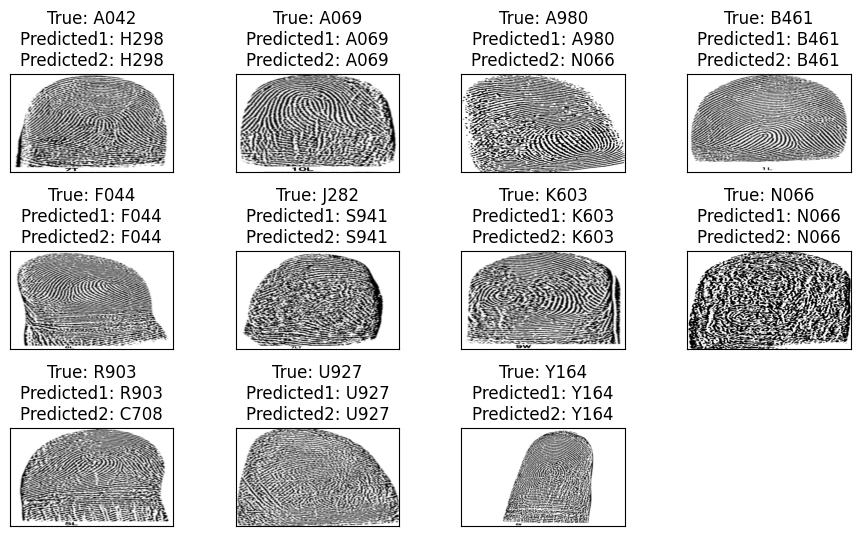

In [93]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import os

# Load models
model1 = keras.models.load_model('/drive/My Drive/h5/fingers_modelMC1a.h5')
model2 = keras.models.load_model('/content/drive/MyDrive/h5/MC1_FT.h5')

# Define class labels
class_labels = ['A042', 'A069', 'A449', 'A980', 'B461', 'C708', 'F044', 'H298', 'J282',
                'K603', 'K629', 'N066', 'R903', 'S941', 'U927', 'V988', 'Y164']

# Initialize the figure
plt.figure(figsize=(9, 9))

# Iterate through the test dataset and make predictions
for i, (test_data_batch, test_labels_batch) in enumerate(test_dataset):
    if i >= 20:  # Displaying only 30 images
        break

    plt.subplot(5, 4, i + 1)
    plt.tight_layout()
    plt.imshow(test_data_batch[0].numpy().astype("uint8"))  # Assuming batch size is 1

    # Make predictions using both models
    pred1 = model1.predict(test_data_batch)
    pred2 = model2.predict(test_data_batch)

    # Convert predictions to class labels
    label1 = class_labels[np.argmax(pred1[0])]
    label2 = class_labels[np.argmax(pred2[0])]

    # Get the true label
    true_label = class_labels[test_labels_batch[0]]

    # Display labels
    plt.title(f"True: {true_label}\nPredicted1: {label1}\nPredicted2: {label2}")

    plt.xticks([])
    plt.yticks([])

plt.show()
